In [1]:
#usefull
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
#leer carpetas
import os

In [2]:
# folder path
dir_fold = 'C:/Users/carlo/OneDrive - Universidad Nacional de Colombia/Semestre 11/MachineLearning/DownScaling/Resultados_Ppt'

# list to store Folders
folder = []

# Iterate directory
for path in os.listdir(dir_fold):
    # check if current path is a file
    #if os.path.isfile(os.path.join(dir_path, path)):
        folder.append(path)

folder

['PptSIATA_Vector.csv',
 'Ppt_EnsambleBagging.csv',
 'Ppt_KNN.csv',
 'Ppt_RedesNeuronales.csv',
 'Ppt_RegLineal.csv']

In [3]:
Ppt = pd.DataFrame()

for i in folder:
    Ppt_i = pd.read_csv(dir_fold+'/'+i)
    Ppt = pd.concat([Ppt, Ppt_i], axis=1)

keys = Ppt.columns
Ppt.tail(2)

,Ppt_SIATA,Ppt_EnsambleBagging,Ppt_KNN,Ppt_RedesNeuronales,Ppt_RegLineal
120046,2.705959,3.204865,2.019127,1.549000,3.014766
120047,15.341826,3.186592,5.072097,1.668605,3.019133


In [4]:
Ppt.mean()

Ppt_SIATA              2.854785
Ppt_EnsambleBagging    2.805390
Ppt_KNN                2.756707
Ppt_RedesNeuronales    2.872045
Ppt_RegLineal          2.854783
dtype: float64

In [5]:
mask  = np.loadtxt('mask_Aburra.asc', skiprows = 6)


Ppt_SIATA_arr = []; Ppt_Ensamble_arr = []; Ppt_KNN_arr = []; Ppt_RNeuron_arr = []; Ppt_RegLineal_arr = []

# n_dat = len(Ppt)/122 # 122 días, esta operación me da la cantidad de datos por fecha
# val_ini = int(len(y_test)%n_dat) # Voto los primeros que no forman una fecha completa
# n_arr = int(len(y_test[val_ini:])/n_dat) # Me dice cuantas fechas quedaron contenidas en el test

c = 0
for k in range(122):
    Ppt_SIATA = mask*0
    Ppt_Ensamble = mask*0
    Ppt_KNN = mask*0
    Ppt_RNeuron = mask*0
    Ppt_RegLineal = mask*0
    for i in range(len(mask)):
        for j in range(len(mask[1])):
            if mask[i][j] == -999:
                Ppt_SIATA[i][j]=np.nan
                Ppt_Ensamble[i][j]=np.nan
                Ppt_KNN[i][j]=np.nan
                Ppt_RNeuron[i][j]=np.nan
                Ppt_RegLineal[i][j]=np.nan
            else:
                Ppt_SIATA[i][j]=Ppt[keys[0]][c]
                Ppt_Ensamble[i][j]=Ppt[keys[1]][c]
                Ppt_KNN[i][j]=Ppt[keys[2]][c]
                Ppt_RNeuron[i][j]=Ppt[keys[3]][c]
                Ppt_RegLineal[i][j]=Ppt[keys[4]][c]
                c = c+1
    Ppt_SIATA_arr.append(Ppt_SIATA)
    Ppt_Ensamble_arr.append(Ppt_Ensamble)
    Ppt_KNN_arr.append(Ppt_KNN)
    Ppt_RNeuron_arr.append(Ppt_RNeuron)
    Ppt_RegLineal_arr.append(Ppt_RegLineal)

## Graficar mapas de resultado por los diferentes métodos

In [42]:
# Seleccionar día para visualizar en las gráficas
n = 25

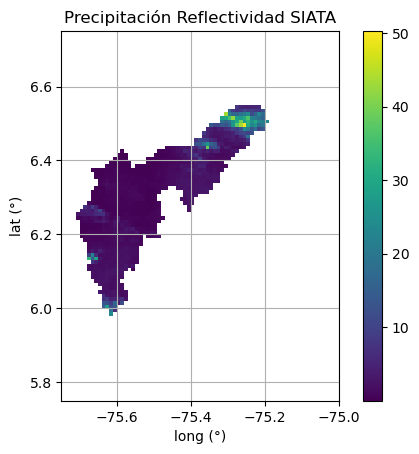

In [43]:
#Grafico Ppt_SIATA
plt.close('Ppt_SIATA')
plt.figure('Ppt_SIATA')
plt.imshow(Ppt_SIATA_arr[n], extent=(-75.75,-75, 5.75, 6.75))
plt.ylim(5.75,6.75)
plt.xlim(-75.75,-75)
plt.gca().set_aspect('equal')
plt.title("Precipitación Reflectividad SIATA")
plt.colorbar()
plt.xlabel('long (°)')
plt.ylabel('lat (°)')
plt.grid()
plt.show('Ppt_SIATA') 

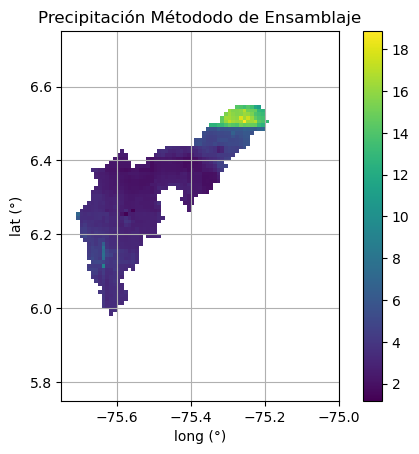

In [44]:
#Grafico Ppt_Ensamble
plt.close('Ppt_Ensamble')
plt.figure('Ppt_Ensamble')
plt.imshow(Ppt_Ensamble_arr[n], extent=(-75.75,-75, 5.75, 6.75))
plt.ylim(5.75,6.75)
plt.xlim(-75.75,-75)
plt.gca().set_aspect('equal')
plt.title("Precipitación Métododo de Ensamblaje")
plt.colorbar()
plt.xlabel('long (°)')
plt.ylabel('lat (°)')
plt.grid()
plt.show('Ppt_Ensamble') 

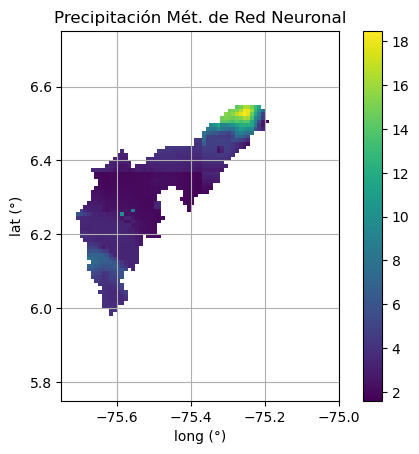

In [45]:
#Grafico Ppt_RNeuron
plt.close('Ppt_RNeuron')
plt.figure('Ppt_RNeuron')
plt.imshow(Ppt_RNeuron_arr[n], extent=(-75.75,-75, 5.75, 6.75))
plt.ylim(5.75,6.75)
plt.xlim(-75.75,-75)
plt.gca().set_aspect('equal')
plt.title("Precipitación Mét. de Red Neuronal")
plt.colorbar()
plt.xlabel('long (°)')
plt.ylabel('lat (°)')
plt.grid()
plt.show('Ppt_RNeuron') 

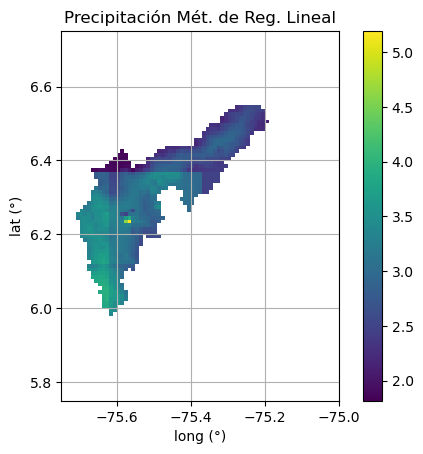

In [46]:
#Grafico Ppt_RegLineal
plt.close('Ppt_RegLineal')
plt.figure('Ppt_RegLineal')
plt.imshow(Ppt_RegLineal_arr[n], extent=(-75.75,-75, 5.75, 6.75))
plt.ylim(5.75,6.75)
plt.xlim(-75.75,-75)
plt.gca().set_aspect('equal')
plt.title("Precipitación Mét. de Reg. Lineal")
plt.colorbar()
plt.xlabel('long (°)')
plt.ylabel('lat (°)')
plt.grid()
plt.show('Ppt_RegLineal') 

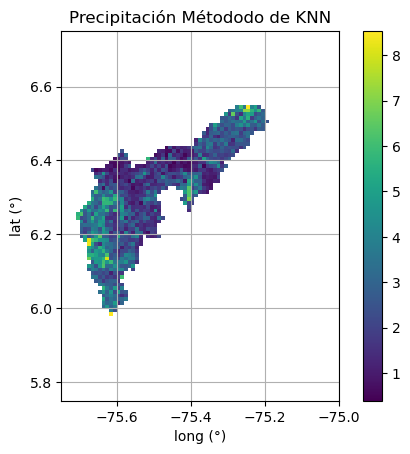

In [47]:
#Grafico Ppt_KNN
plt.close('Ppt_KNN')
plt.figure('Ppt_KNN')
plt.imshow(Ppt_KNN_arr[n], extent=(-75.75,-75, 5.75, 6.75))
plt.ylim(5.75,6.75)
plt.xlim(-75.75,-75)
plt.gca().set_aspect('equal')
plt.title("Precipitación Métododo de KNN")
plt.colorbar()
plt.xlabel('long (°)')
plt.ylabel('lat (°)')
plt.grid()
plt.show('Ppt_KNN') 